## Random sample consensus (RANSAC)


- Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. 
- Therefore, it also can be interpreted as an outlier detection method.


- It is a non-deterministic algorithm in the sense that it produces a reasonable result only with a certain probability, with this probability increasing as more iterations are allowed. 



- RANSAC uses repeated random sub-sampling.
- A basic assumption is that the data consists of "inliers", i.e., data whose distribution can be explained by some set of model parameters, though may be subject to noise, and "outliers" which are data that do not fit the model.
- The outliers can come, for example, from extreme values of the noise or from erroneous measurements or incorrect hypotheses about the interpretation of data. 
- RANSAC also assumes that, given a (usually small) set of inliers, there exists a procedure which can estimate the parameters of a model that optimally explains or fits this data.

- A simple example is fitting a line in two dimensions to a set of observations.
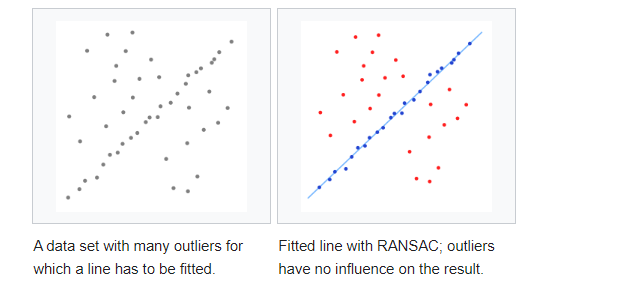

- Assuming that this set contains both inliers, i.e., points which approximately can be fitted to a line, and outliers, points which cannot be fitted to this line, a simple least squares method for line fitting will generally produce a line with a bad fit to the data including inliers and outliers. 
- The reason is that it is optimally fitted to all points, including the outliers.


- RANSAC, on the other hand, attempts to exclude the outliers and find a linear model that only uses the inliers in its calculation. 
- This is done by fitting linear models to several random samplings of the data and returning the model that has the best fit to a subset of the data. 
- Since the inliers tend to be more linearly related than a random mixture of inliers and outliers, a random subset that consists entirely of inliers will have the best model fit. 
- In practice, there is no guarantee that a subset of inliers will be randomly sampled, and the probability of the algorithm succeeding depends on the proportion of inliers in the data as well as the choice of several algorithm parameters.

https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py

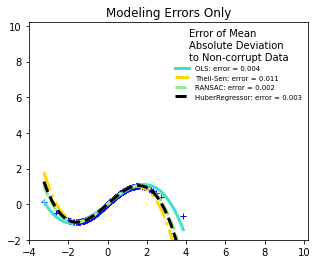

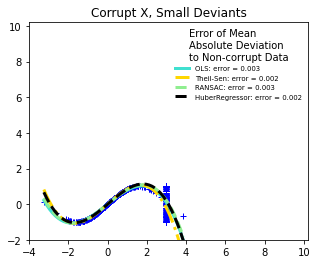

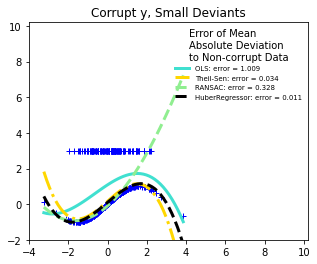

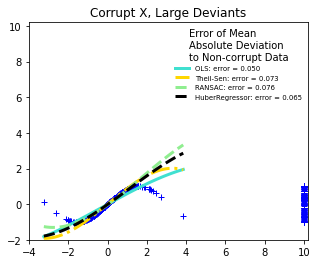

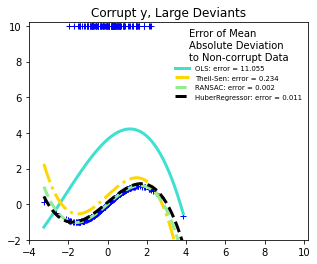

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (
    LinearRegression,
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)

X = np.random.normal(size=400)
y = np.sin(X)
# Make sure that it X is 2D
X = X[:, np.newaxis]

X_test = np.random.normal(size=200)
y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

y_errors = y.copy()
y_errors[::3] = 3

X_errors = X.copy()
X_errors[::3] = 3

y_errors_large = y.copy()
y_errors_large[::3] = 10

X_errors_large = X.copy()
X_errors_large[::3] = 10

estimators = [
    ("OLS", LinearRegression()),
    ("Theil-Sen", TheilSenRegressor(random_state=42)),
    ("RANSAC", RANSACRegressor(random_state=42)),
    ("HuberRegressor", HuberRegressor()),
]
colors = {
    "OLS": "turquoise",
    "Theil-Sen": "gold",
    "RANSAC": "lightgreen",
    "HuberRegressor": "black",
}
linestyle = {"OLS": "-", "Theil-Sen": "-.", "RANSAC": "--", "HuberRegressor": "--"}
lw = 3

x_plot = np.linspace(X.min(), X.max())
for title, this_X, this_y in [
    ("Modeling Errors Only", X, y),
    ("Corrupt X, Small Deviants", X_errors, y),
    ("Corrupt y, Small Deviants", X, y_errors),
    ("Corrupt X, Large Deviants", X_errors_large, y),
    ("Corrupt y, Large Deviants", X, y_errors_large),
]:
    plt.figure(figsize=(5, 4))
    plt.plot(this_X[:, 0], this_y, "b+")

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        mse = mean_squared_error(model.predict(X_test), y_test)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(
            x_plot,
            y_plot,
            color=colors[name],
            linestyle=linestyle[name],
            linewidth=lw,
            label="%s: error = %.3f" % (name, mse),
        )

    legend_title = "Error of Mean\nAbsolute Deviation\nto Non-corrupt Data"
    legend = plt.legend(
        loc="upper right", frameon=False, title=legend_title, prop=dict(size="x-small")
    )
    plt.xlim(-4, 10.2)
    plt.ylim(-2, 10.2)
    plt.title(title)
plt.show()

# Anomaly detection

- anomaly detection (also referred to as outlier detection and sometimes as novelty detection) is generally understood to be the identification of rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well defined notion of normal behaviour.
- Such examples may arouse suspicions of being generated by a different mechanism, or appear inconsistent with the remainder of that set of data.


- Anomaly detection finds application in many domains including cyber security, medicine, machine vision, statistics, neuroscience, law enforcement and financial fraud to name only a few. 


- Anomalies were initially searched for clear rejection or omission from the data to aid statistical analysis, for example to compute the mean or standard deviation. 
- They were also removed to better predictions from models such as linear regression, and more recently their removal aids the performance of machine learning algorithms. 
- However, in many applications anomalies themselves are of interest and are the observations most desirous in the entire data set, which need to be identified and separated from noise or irrelevant outliers.


- Three broad categories of anomaly detection techniques exist.
    - Supervised anomaly detection techniques require a data set that has been labeled as "normal" and "abnormal" and involves training a classifier.
    - However, this approach is rarely used in anomaly detection due to the general unavailability of labelled data and the inherent unbalanced nature of the classes.
    - Semi-supervised anomaly detection techniques assume that some portion of the data is labelled. This may be any combination of the normal or anomalous data, but more often than not the techniques construct a model representing normal behavior from a given normal training data set, and then test the likelihood of a test instance to be generated by the model. 
    - Unsupervised anomaly detection techniques assume the data is unlabelled and are by far the most commonly used due to their wider and relevant application.

# Outlier Detection Unsupervised Algorithms

In [11]:
import warnings
warnings.filterwarnings("ignore")

# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html

## sklearn.covariance.EllipticEnvelope
    class sklearn.covariance.EllipticEnvelope(*, store_precision=True, assume_centered=False, support_fraction=None, contamination=0.1, random_state=None)[source]

- An object for detecting outliers in a Gaussian distributed dataset.

#### Important Parameters:

    contaminationfloat, default=0.1
    The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Range is (0, 0.5].

    

In [12]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

### used 2-wheeler data

In [13]:
df = pd.read_csv('AnomalyDetection.csv') 

In [14]:
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


In [15]:
df['Mileage'] += 10

In [16]:
df.loc[df['Mileage'] <=20, 'Mileage'] # synthetic data (modifications made to data)

4      15.608853
37     18.145891
109    13.037603
119    11.398964
184    19.743200
200    17.312213
209    14.980189
274    19.385704
432    17.175456
439    15.021021
443    17.043090
452    19.398712
499    16.277995
504    12.245049
566    16.087402
610    18.211729
646    12.981331
900    11.729261
901    15.892624
902    16.393027
903    15.584939
Name: Mileage, dtype: float64

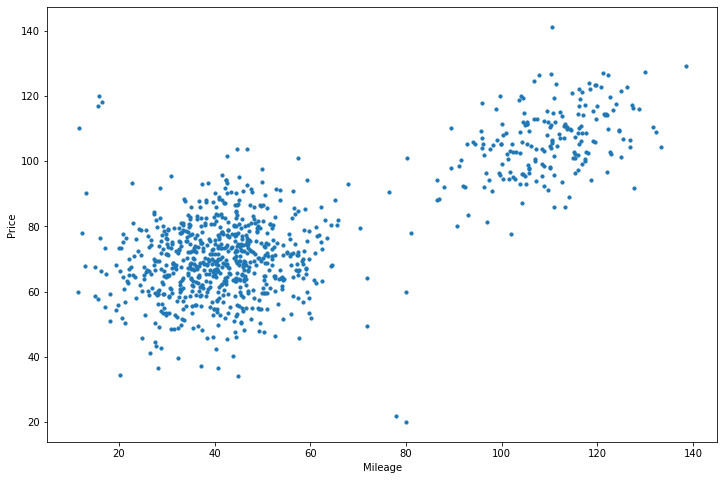

In [17]:
plt.scatter(df['Mileage'],df['Price'], s=10)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Elliptic Envelope

### On First cluster

In [18]:
less_dense = df.loc[df['Mileage'] <= 80]

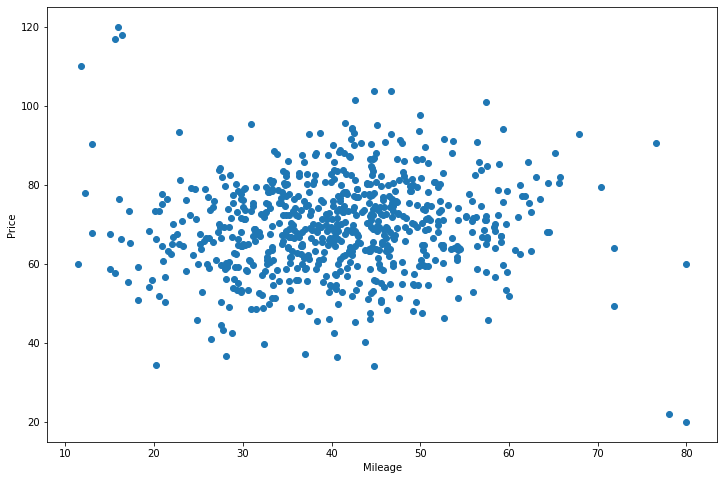

In [19]:
plt.scatter(less_dense['Mileage'], less_dense['Price'],)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

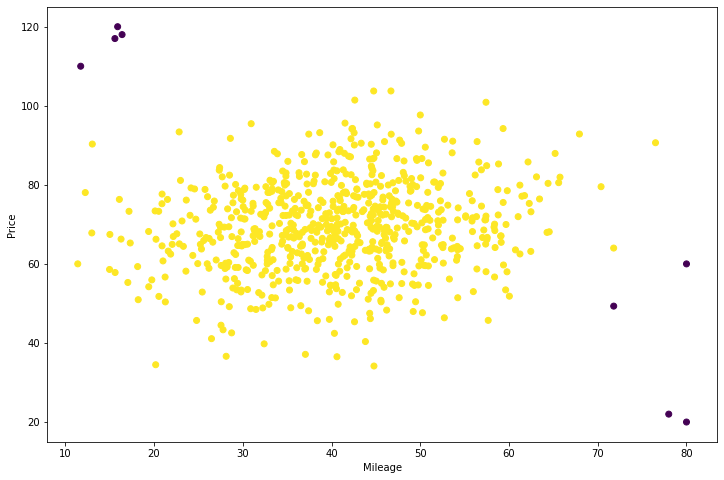

In [20]:
label = EllipticEnvelope(random_state=0, contamination=0.01).fit_predict(less_dense.iloc[:,:2])
less_dense['is_outlier_ee'] = label



# Plotting
plt.scatter(less_dense['Mileage'], less_dense['Price'], c=less_dense['is_outlier_ee'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

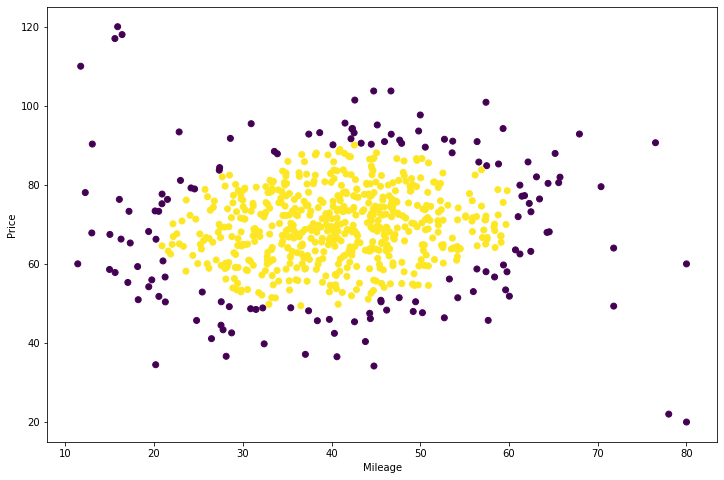

In [27]:
label = EllipticEnvelope(random_state=0, contamination=0.2).fit_predict(less_dense.iloc[:,:2])
less_dense['is_outlier_ee'] = label



# Plotting
plt.scatter(less_dense['Mileage'], less_dense['Price'], c=less_dense['is_outlier_ee'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [28]:
less_dense

,Mileage,Price,is_outlier_ee
0,64.282388,67.967708,-1
1,27.331911,70.023637,1
2,46.548113,68.080455,1
3,52.567541,71.058755,1
4,15.608853,57.822432,-1
...,...,...,...
902,16.393027,118.000000,-1
903,15.584939,117.000000,-1
904,80.000000,20.000000,-1
905,78.000000,22.000000,-1


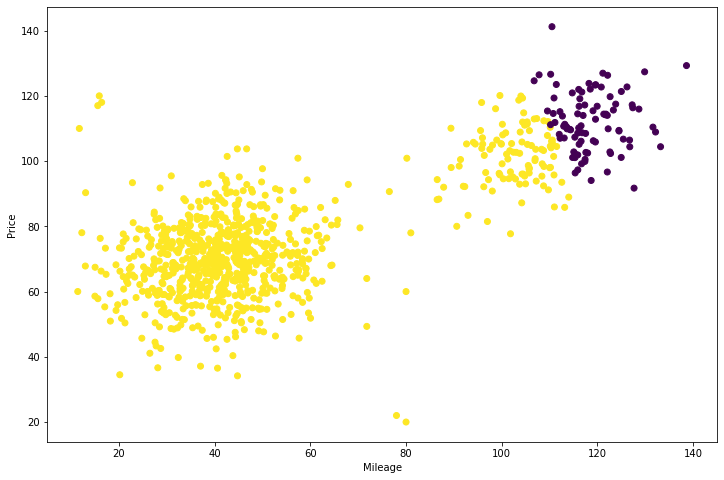

In [29]:
cov = EllipticEnvelope(random_state=0).fit_predict(df.iloc[:,:2])
df['is_outlier_ee'] = cov
plt.scatter(df['Mileage'], df['Price'], c=df['is_outlier_ee'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [23]:
df['is_outlier_ee'].value_counts()

 1    817
-1     91
Name: is_outlier_ee, dtype: int64

## Isolation Forest

In [30]:
clf = IsolationForest(contamination = 0.05,
                      random_state=0, 
                      n_estimators=1000).fit(df.iloc[:, :2])


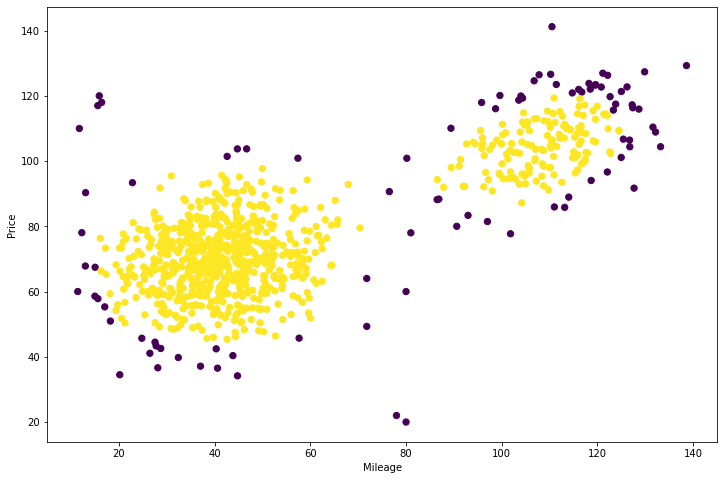

In [33]:
clf = IsolationForest(contamination = 0.10,
                      random_state=0,
                      n_estimators=1000).fit_predict(df.iloc[:, :2])


df['is_outlier_if'] = clf
plt.scatter(df['Mileage'],
            df['Price'], 
            s=40, 
            c=df['is_outlier_if'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [15]:
df['is_outlier_if'].value_counts()

 1    862
-1     46
Name: is_outlier_if, dtype: int64

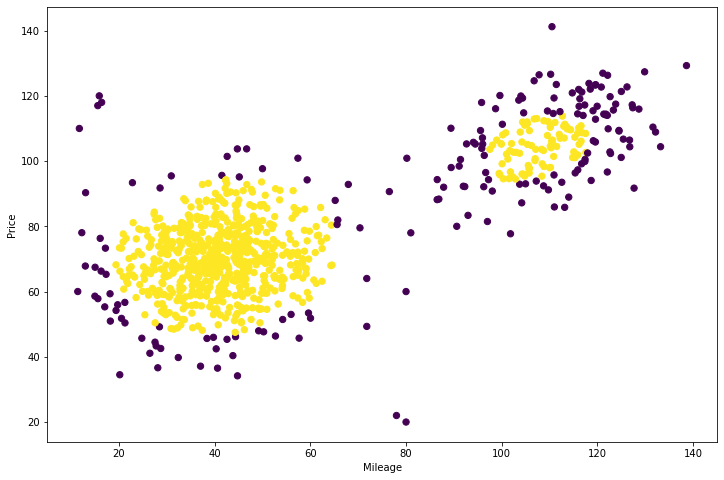

In [34]:
clf = IsolationForest(contamination = 0.20,
                      random_state=0,
                      n_estimators=1000).fit_predict(df.iloc[:, :2])


df['is_outlier_if'] = clf
plt.scatter(df['Mileage'],
            df['Price'], 
            s=40, 
            c=df['is_outlier_if'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [35]:
df['is_outlier_if'].value_counts()

 1    726
-1    182
Name: is_outlier_if, dtype: int64

## LOF LocalOutlierFactor

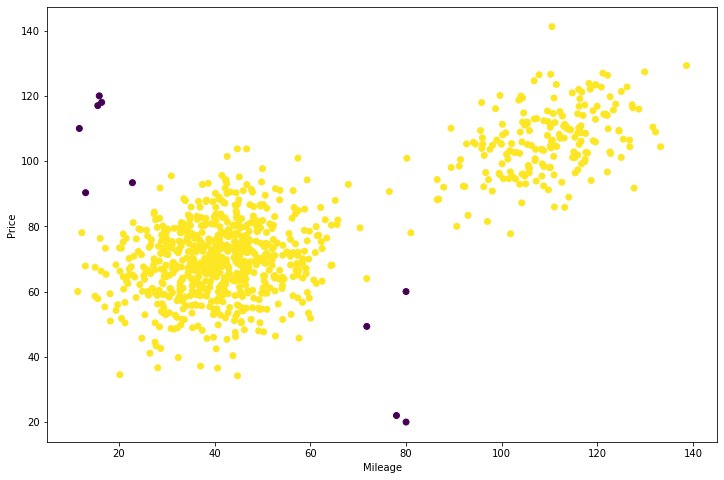

In [16]:
clf = LocalOutlierFactor(n_neighbors=25, contamination=0.01).fit_predict(df.iloc[:, :2])


df['is_outlier_lof'] = clf
plt.scatter(df['Mileage'], df['Price'], c=df['is_outlier_lof'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [17]:
df.head(2)

,Mileage,Price,is_outlier_ee,is_outlier_if,is_outlier_lof
0,64.282388,67.967708,1,1,1
1,27.331911,70.023637,1,1,1
